Firstly, we will explore our purchase dataset.

After that, we will examine similarities and differences between segmentation and purchase datasets.

Finally, we'll make use of the segmentation model we built to divide our customers into segments.

# Libraries 

In [3]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Import

Each observation is a transaction in this dataset. 

Therefore, several different observations can relate to the same customer.

We'll only focus on the purchases of chocolate candy bars.

In [6]:
df_purchase = pd.read_csv('purchase+data.csv')

# Data Exploration

In [8]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


We don't have an equal no. of records per customer or an equal no. of records per day.

In [10]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

# Applying the Segmentation Model (Grouping transactions by segments)

An important part of customer analytics is knowing how similar customers are to each other.We will analyze customers purchasing behaviour.

We can place our new customers into the four clusters we've determined.

### Import Segmentation Model

In [14]:
scaler = pickle.load(open('scaler.pickle', 'rb'))

In [15]:
pca = pickle.load(open('pca.pickle', 'rb'))

In [16]:
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

### Standardization

In [18]:
features = df_purchase[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
df_purchase_segm_std = scaler.transform(features)

### PCA

In [20]:
# We use PCA to transform the geodemographic features of our new customers into three principal components 
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)      # Gives us PCA scores for each line

In [21]:
# Customers appear on more than one transaction or line, so we will have some duplicates.

In [22]:
# We've got everything we need to place the new customers into clusters.
# To achieve that, we will need to find the PCA scores to our K-means PCA model and determine the clusters.

### K-means PCA

In [24]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [25]:
df_purchase_predictors = df_purchase.copy()

In [26]:
# Creating a 'Segment' column indicating which cluster an observation belongs to
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

#### We have segmented our new data

From here on, we will divide the purchase analytics into two major parts - Descriptive analysis and modeling.

# Descriptive Analysis on Segments

We'll firstly group our data by individuals and then by segments to gain insight into customers shopping habits.

We'll see how often each segment group goes shopping, how much money they spend and what products they purchase.

### Data Analysis by Customer

In [32]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


In [33]:
# In order to analyze data on an individual level, we need a dataframe which has 1 record per individual.
# With the help of this new dataframe, we'll be able to create a summary of each customer's purchasing behaviour. 

In [34]:
# Firstly, we'd like the no. of purchase occassions per customer.
temp1 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index=False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence': 'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [35]:
# Now we're interested in the no. of times the customer has bought a product from category of interest
temp2 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index=False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence':'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


The above table contains the no. of times a visitor has entered the store and the no. of times they have purchased something.

In [37]:
# Calculating avg. purchase frequency per individual - No. of times a person has visited the store / total no. of visits by that individual
temp3['Average_N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [38]:
# Which segment a customer belongs to ?
temp4 = df_purchase_predictors[['ID','Segment']].groupby(['ID'], as_index=False).mean()
temp4['Segment'] = pd.to_numeric(temp4['Segment'], errors='coerce').astype('Int64')
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [39]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,0
200000002,87,11,0.126437,3
200000003,97,10,0.103093,0
200000004,85,11,0.129412,1
200000005,111,13,0.117117,0


Here we can observe the shopping behaviour of each customer.
Since we have 500 individuals, it will be quite difficult to find patterns. 
Instead, what we can do is analyze the behaviour of the four segments.

# Segment Proportions

In [42]:
# Grouping the different segments
segm_prop = df_purchase_descr[['N_Purchases','Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns= {'N_Purchases': 'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0,0.290
1,0.362
2,0.152
3,0.196


Text(0.5, 1.0, 'Segment Proportions')

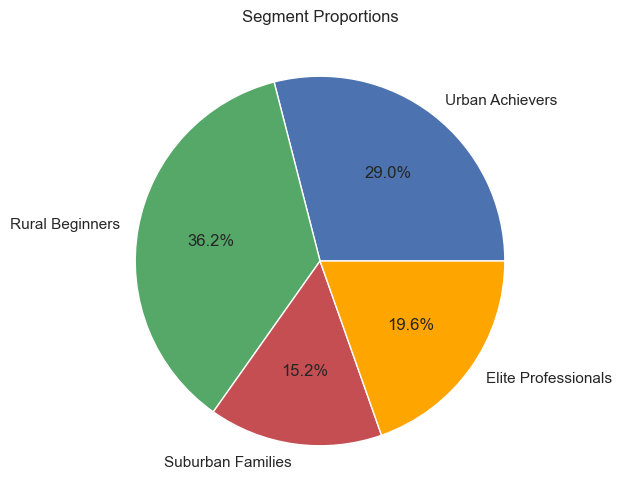

In [43]:
plt.figure(figsize=(9, 6))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['Urban Achievers', 'Rural Beginners', 'Suburban Families', 'Elite Professionals'],
        autopct = '%1.1f%%',
        colors = ('b','g','r','orange'))
plt.title('Segment Proportions') 

This pie chart describes how the store visitors are distributed across segments.

The customer base is dominated by Rural Beginners and Urban Achievers — together they form about 65% of all visitors.

# Purchase Occassion and Purchase Incidence

How often do people from different segments visit the store ?

In [47]:
# Mean shows the average behaviour of each segment
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean.head()

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0,120.489655,34.965517,0.258081
1,114.303867,22.823204,0.201760
2,118.828947,27.171053,0.228956
3,117.367347,34.408163,0.282601


In [48]:
# Std. deviation shows how homogeneous each segment is
segments_std = df_purchase_descr.groupby(['Segment']).std()

Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

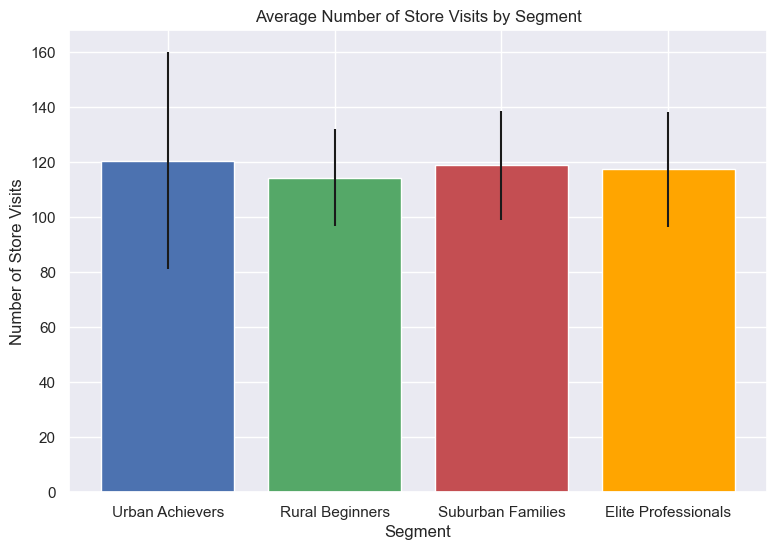

In [49]:
plt.figure(figsize=(9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Urban Achievers', 'Rural Beginners', 'Suburban Families', 'Elite Professionals'),
        height = segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'],
        color = ('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')

Urban Achievers and Suburban Families are the most engaged visitors, coming to stores more frequently.

But since variability is high, not all individuals in these groups are consistent store-goers.

Text(0.5, 1.0, 'Number of Purchases by Segment')

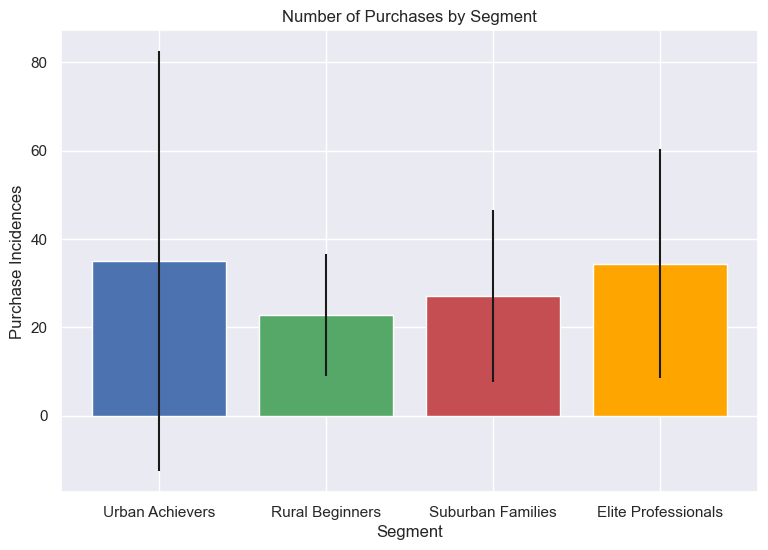

In [51]:
plt.figure(figsize=(9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Urban Achievers', 'Rural Beginners', 'Suburban Families', 'Elite Professionals'),
        height = segments_mean['N_Purchases'],
        yerr = segments_std['N_Purchases'],
        color = ('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchases by Segment')

Urban Achievers and Elite Professionals, though not the largest segments, are the most profitable — they convert visits into purchases more effectively.

Rural Beginners form the largest segment but make fewer purchases, suggesting a lower conversion rate.

# Brand Choice

Which brand is the customer going to choose ?

In [56]:
# We'll focus only on the observations where customers have bought atleast one chocolate candy bar
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [57]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix='Brand', prefix_sep='_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,False,True,False,False,False,0,200000001
11,False,False,False,False,True,0,200000001
19,True,False,False,False,False,0,200000001
24,False,False,False,True,False,0,200000001
29,False,True,False,False,False,0,200000001
...,...,...,...,...,...,...,...
58621,False,True,False,False,False,0,200000500
58648,True,False,False,False,False,0,200000500
58674,False,True,False,False,False,0,200000500
58687,False,True,False,False,False,0,200000500


In [58]:
temp = brand_dummies.groupby(['ID'], as_index=True).mean()

In [59]:
mean_brand_choice = temp.groupby(['Segment'], as_index=True).mean()

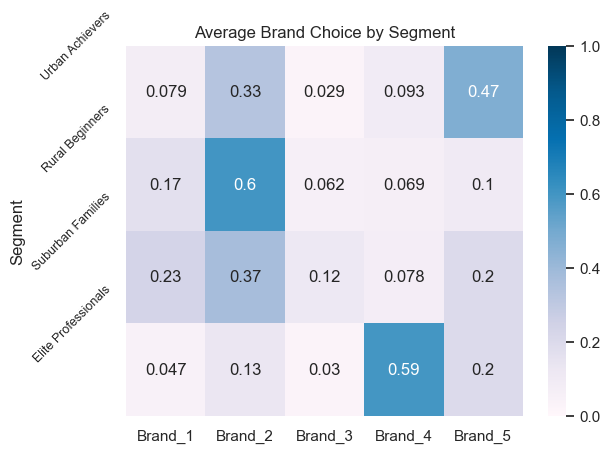

In [60]:
sns.heatmap(mean_brand_choice,
            vmin = 0,
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0, 1, 2, 3], ['Urban Achievers', 'Rural Beginners', 'Suburban Families', 'Elite Professionals'], rotation=45, fontsize=9)
plt.title('Average Brand Choice by Segment')
plt.show()

Overall, cheaper brands (Brand_1 and Brand_3) have lower average choices across segments, while mid-range (Brand_2) and higher-end (Brand_4 and Brand_5) brands attract more specific segments, with Elite Professionals favoring the priciest options.

# Revenue

In [63]:
# Calculating revenue for each brand
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index=False).sum()
segments_brand_revenue

C:\Users\Asus\AppData\Local\Temp\ipykernel_18276\1748515506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']


,Segment,Revenue Brand 1
0,0,912.12
1,1,2807.51
2,2,1869.77
3,3,716.25


In [64]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index=False).sum()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18276\176104719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']


In [65]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:, 'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 3']] = temp[['Segment', 'Revenue Brand 3']].groupby(['Segment'], as_index=False).sum()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18276\1145858231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']


In [66]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:, 'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 4']] = temp[['Segment', 'Revenue Brand 4']].groupby(['Segment'], as_index=False).sum()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18276\637102325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']


In [67]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:, 'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 5']] = temp[['Segment', 'Revenue Brand 5']].groupby(['Segment'], as_index=False).sum()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18276\1116607944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']


In [68]:
# We've obtained the revenue for each of the segments for the 5 different brands

In [69]:
# Calculating the entire revenue by segment 
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] + segments_brand_revenue['Revenue Brand 2'] + segments_brand_revenue['Revenue Brand 3'] + segments_brand_revenue['Revenue Brand 4'] + segments_brand_revenue['Revenue Brand 5'])
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,912.12,5222.99,603.79,2268.95,17838.72,26846.57
1,1,2807.51,11742.86,2388.88,1910.89,2638.52,21488.66
2,2,1869.77,3382.47,2303.31,1165.16,3638.75,12359.46
3,3,716.25,1419.99,725.54,13695.10,5505.01,22061.89


In [70]:
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Urban Achievers', 
                                                                           1:'Rural Beginners', 
                                                                           2:'Suburban Families', 
                                                                           3:'Elite Professionals'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Urban Achievers,912.12,5222.99,603.79,2268.95,17838.72,26846.57,0.290
Rural Beginners,2807.51,11742.86,2388.88,1910.89,2638.52,21488.66,0.362
Suburban Families,1869.77,3382.47,2303.31,1165.16,3638.75,12359.46,0.152
Elite Professionals,716.25,1419.99,725.54,13695.10,5505.01,22061.89,0.196


Overall, customer preferences vary by segment, with Urban Achievers and Elite Professionals favoring premium brands, while Rural Beginners and Suburban Families lean towards mid-range options, impacting revenue patterns.